# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587FA24 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587FA24issues.json

In [14]:
import os

import warnings
warnings.filterwarnings('ignore')

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [15]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587FA24issues.json')]

In [16]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [17]:
# Sanity test: print rows in our DataFrame

issues_df
    

issue_number                                       issue_title  \
0             113   React Repository Issue: Performance Degradation   
1             112       React Repository Issue: Routing Not Working   
2             111        React Repository Issue: State Not Updating   
3             109    React Repository Issue: CSS Styles Not Applied   
4             108  React Repository Issue: Unable to Fetch API Data   
..            ...                                               ...   
106             5                                      Test Issue 1   
107             4                                      TestIssue_04   
108             3                                      TestIssue_03   
109             2                                      TestIssue_02   
110             1                                      TestIssue_01   

                                            issue_body  created_at  \
0    I am noticing a performance degradation in my ...  2024-03-19   
1    I have encountered an issue in my React reposi...  2024-03-19   
2    I am experiencing an issue in my React reposit...  2024-03-19   
3    I have an issue in my React repository where t...  2024-03-19   
4    I am encountering an issue in my React reposit...  2024-03-19   
..                                                 ...         ...   
106                              No Body for the Issue  2024-02-21   
107                              No Body for the Issue  2024-02-17   
108                              No Body for the Issue  2024-02-16   
109                              No Body for the Issue  2024-02-16   
110                              No Body for the Issue  2024-02-15   

      closed_at                                             labels   State  \
0    2024-03-19  [Category:Inquiry, DetectionPhase:Field, Origi...  closed   
1    2024-03-19  [Category:Inquiry, DetectionPhase:Field, Origi...  closed   
2    2024-03-19  [Category:Inquiry, DetectionPhase:Field, Origi...  closed   
3    2024-03-19  [Category:Enhancement, DetectionPhase:Coding, ...  closed   
4    2024-03-19  [Category:Enhancement, DetectionPhase:Coding, ...  closed   
..          ...                                                ...     ...   
106        None                         [bug, duplicate, feedback]    open   
107  2024-03-09                                 [invalid, wontfix]  closed   
108        None                    [invalid, performance problems]    open   
109  2024-03-09                            [enhancement, feedback]  closed   
110  2024-03-09                                 [bug, help wanted]  closed   

          Author  
0    PSP24SCM98D  
1    PSP24SCM98D  
2    PSP24SCM98D  
3    PSP24SCM98D  
4    PSP24SCM98D  
..           ...  
106  GSP23SCM93J  
107   SPM587SP24  
108   SPM587SP24  
109   SPM587SP24  
110   SPM587SP24  

[111 rows x 8 columns]

In [18]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [19]:
wrangled_issues_df

Author   State   closed_at  created_at  issue_number  \
0    PSP24SCM98D  closed  2024-03-19  2024-03-19           113   
1    PSP24SCM98D  closed  2024-03-19  2024-03-19           112   
2    PSP24SCM98D  closed  2024-03-19  2024-03-19           111   
3    PSP24SCM98D  closed  2024-03-19  2024-03-19           109   
4    PSP24SCM98D  closed  2024-03-19  2024-03-19           108   
..           ...     ...         ...         ...           ...   
106  GSP23SCM93J    open        None  2024-02-21             5   
107   SPM587SP24  closed  2024-03-09  2024-02-17             4   
108   SPM587SP24    open        None  2024-02-16             3   
109   SPM587SP24  closed  2024-03-09  2024-02-16             2   
110   SPM587SP24  closed  2024-03-09  2024-02-15             1   

                                                labels  OriginationPhase  \
0    [Category:Inquiry, DetectionPhase:Field, Origi...               NaN   
1    [Category:Inquiry, DetectionPhase:Field, Origi...               NaN   
2    [Category:Inquiry, DetectionPhase:Field, Origi...               NaN   
3    [Category:Enhancement, DetectionPhase:Coding, ...               NaN   
4    [Category:Enhancement, DetectionPhase:Coding, ...               NaN   
..                                                 ...               ...   
106                         [bug, duplicate, feedback]               NaN   
107                                 [invalid, wontfix]               NaN   
108                    [invalid, performance problems]               NaN   
109                            [enhancement, feedback]               NaN   
110                                 [bug, help wanted]               NaN   

     DetectionPhase  Category  Priority  Status  
0               NaN       NaN       NaN     NaN  
1               NaN       NaN       NaN     NaN  
2               NaN       NaN       NaN     NaN  
3               NaN       NaN       NaN     NaN  
4               NaN       NaN       NaN     NaN  
..              ...       ...       ...     ...  
106             NaN       NaN       NaN     NaN  
107             NaN       NaN       NaN     NaN  
108             NaN       NaN       NaN     NaN  
109             NaN       NaN       NaN     NaN  
110             NaN       NaN       NaN     NaN  

[111 rows x 11 columns]

In [20]:
for i in range(0, len(wrangled_issues_df)):
    if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            if len(label.split(':')) == 2:
                label_name= (label.split(':'))[0]
                label_value= (label.split(':'))[1]
                wrangled_issues_df.loc[i, label_name]=label_value
 

In [21]:
wrangled_issues_df

Author   State   closed_at  created_at  issue_number  \
0    PSP24SCM98D  closed  2024-03-19  2024-03-19           113   
1    PSP24SCM98D  closed  2024-03-19  2024-03-19           112   
2    PSP24SCM98D  closed  2024-03-19  2024-03-19           111   
3    PSP24SCM98D  closed  2024-03-19  2024-03-19           109   
4    PSP24SCM98D  closed  2024-03-19  2024-03-19           108   
..           ...     ...         ...         ...           ...   
106  GSP23SCM93J    open        None  2024-02-21             5   
107   SPM587SP24  closed  2024-03-09  2024-02-17             4   
108   SPM587SP24    open        None  2024-02-16             3   
109   SPM587SP24  closed  2024-03-09  2024-02-16             2   
110   SPM587SP24  closed  2024-03-09  2024-02-15             1   

                                                labels OriginationPhase  \
0    [Category:Inquiry, DetectionPhase:Field, Origi...    Documentation   
1    [Category:Inquiry, DetectionPhase:Field, Origi...           Coding   
2    [Category:Inquiry, DetectionPhase:Field, Origi...           Coding   
3    [Category:Enhancement, DetectionPhase:Coding, ...           Coding   
4    [Category:Enhancement, DetectionPhase:Coding, ...           Coding   
..                                                 ...              ...   
106                         [bug, duplicate, feedback]              NaN   
107                                 [invalid, wontfix]              NaN   
108                    [invalid, performance problems]              NaN   
109                            [enhancement, feedback]              NaN   
110                                 [bug, help wanted]              NaN   

    DetectionPhase     Category Priority         Status Completed  
0            Field      Inquiry      Low  pendingReview       NaN  
1            Field      Inquiry      Low     InProgress       NaN  
2            Field      Inquiry      Low     InProgress       NaN  
3           Coding  Enhancement    Major       Rejected       NaN  
4           Coding  Enhancement    Major       Rejected       NaN  
..             ...          ...      ...            ...       ...  
106            NaN          NaN      NaN            NaN       NaN  
107            NaN          NaN      NaN            NaN       NaN  
108            NaN          NaN      NaN            NaN       NaN  
109            NaN          NaN      NaN            NaN       NaN  
110            NaN          NaN      NaN            NaN       NaN  

[111 rows x 12 columns]

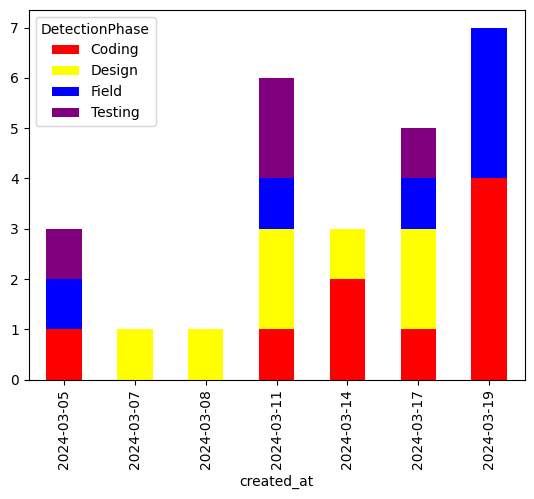

In [22]:
# Plot in Bar Chart the total number of issues created every day for every Detection Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green', 'pink'], grid=False)

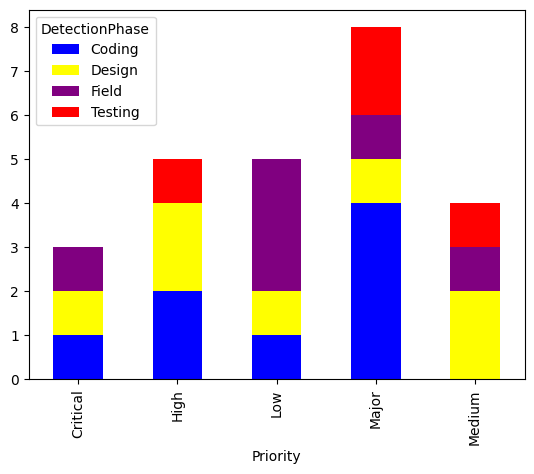

In [23]:
# Plot in Bar Chart the total number of issues created for every Phase based on their priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green', 'pink'], grid=False)

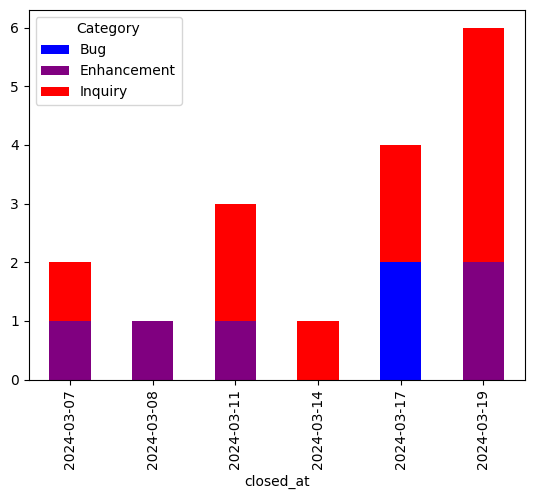

In [24]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green', 'pink'], grid=False)

#  Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase

In [25]:
# Requirement #1: Add your code here



#  Requirement #2: # Plot in Bar Chart the total number of issues created for every Phase based on their Status

In [26]:
# Requirement #2: Add your code here

